In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv('cancer_reg.csv', encoding = "ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null int64
TARGET_deathRate           3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null int64
popEst2015                 3047 non-null int64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null object
MedianAge                  3047 non-null float64
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
Geography                  3047 non-null object
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctSomeCol18_24            762 non-null float64
PctBachDeg18_24     

In [113]:
df.columns = [i.lower() for i in df.columns]
df.head().T

0  \
avganncount                                   1397   
avgdeathsperyear                               469   
target_deathrate                             164.9   
incidencerate                                489.8   
medincome                                    61898   
popest2015                                  260131   
povertypercent                                11.2   
studypercap                                499.748   
binnedinc                        (61494.5, 125635]   
medianage                                     39.3   
medianagemale                                 36.9   
medianagefemale                               41.7   
geography                Kitsap County, Washington   
avghouseholdsize                              2.54   
percentmarried                                52.5   
pctnohs18_24                                  11.5   
pcths18_24                                    39.5   
pctsomecol18_24                               42.1   
pctbachdeg18_24                                6.9   
pcths25_over                                  23.2   
pctbachdeg25_over                             19.6   
pctemployed16_over                            51.9   
pctunemployed16_over                             8   
pctprivatecoverage                            75.1   
pctprivatecoveragealone                        NaN   
pctempprivcoverage                            41.6   
pctpubliccoverage                             32.9   
pctpubliccoveragealone                          14   
pctwhite                                   81.7805   
pctblack                                   2.59473   
pctasian                                   4.82186   
pctotherrace                               1.84348   
pctmarriedhouseholds                       52.8561   
birthrate                                  6.11883   

                                                   1  \
avganncount                                      173   
avgdeathsperyear                                  70   
target_deathrate                               161.3   
incidencerate                                  411.6   
medincome                                      48127   
popest2015                                     43269   
povertypercent                                  18.6   
studypercap                                  23.1112   
binnedinc                         (48021.6, 51046.4]   
medianage                                         33   
medianagemale                                   32.2   
medianagefemale                                 33.7   
geography                Kittitas County, Washington   
avghouseholdsize                                2.34   
percentmarried                                  44.5   
pctnohs18_24                                     6.1   
pcths18_24                                      22.4   
pctsomecol18_24                                   64   
pctbachdeg18_24                                  7.5   
pcths25_over                                      26   
pctbachdeg25_over                               22.7   
pctemployed16_over                              55.9   
pctunemployed16_over                             7.8   
pctprivatecoverage                              70.2   
pctprivatecoveragealone                         53.8   
pctempprivcoverage                              43.6   
pctpubliccoverage                               31.1   
pctpubliccoveragealone                          15.3   
pctwhite                                     89.2285   
pctblack                                    0.969102   
pctasian                                     2.24623   
pctotherrace                                 3.74135   
pctmarriedhouseholds                         45.3725   
birthrate                                     4.3331   

                                                    2  \
avganncount                                       102   
avgdeathsperyear                                   50   
target_deathrate          

In [114]:
def miss(x):
    l = []
    for i in x.columns:
        l.append(x[i].isnull().sum())
        
    miss = pd.DataFrame()
    miss['columns'] = x.columns
    miss['missing'] = l
    miss = miss[miss.missing!=0]
    return miss

In [115]:
miss(df)

columns  missing
17          pctsomecol18_24     2285
21       pctemployed16_over      152
24  pctprivatecoveragealone      609

In [116]:
state = []

for i in df.geography:
    u = i.split(',')
    state.append(u[1].strip())
    
df['state'] = state
df.head().T

0  \
avganncount                                   1397   
avgdeathsperyear                               469   
target_deathrate                             164.9   
incidencerate                                489.8   
medincome                                    61898   
popest2015                                  260131   
povertypercent                                11.2   
studypercap                                499.748   
binnedinc                        (61494.5, 125635]   
medianage                                     39.3   
medianagemale                                 36.9   
medianagefemale                               41.7   
geography                Kitsap County, Washington   
avghouseholdsize                              2.54   
percentmarried                                52.5   
pctnohs18_24                                  11.5   
pcths18_24                                    39.5   
pctsomecol18_24                               42.1   
pctbachdeg18_24                                6.9   
pcths25_over                                  23.2   
pctbachdeg25_over                             19.6   
pctemployed16_over                            51.9   
pctunemployed16_over                             8   
pctprivatecoverage                            75.1   
pctprivatecoveragealone                        NaN   
pctempprivcoverage                            41.6   
pctpubliccoverage                             32.9   
pctpubliccoveragealone                          14   
pctwhite                                   81.7805   
pctblack                                   2.59473   
pctasian                                   4.82186   
pctotherrace                               1.84348   
pctmarriedhouseholds                       52.8561   
birthrate                                  6.11883   
state                                   Washington   

                                                   1  \
avganncount                                      173   
avgdeathsperyear                                  70   
target_deathrate                               161.3   
incidencerate                                  411.6   
medincome                                      48127   
popest2015                                     43269   
povertypercent                                  18.6   
studypercap                                  23.1112   
binnedinc                         (48021.6, 51046.4]   
medianage                                         33   
medianagemale                                   32.2   
medianagefemale                                 33.7   
geography                Kittitas County, Washington   
avghouseholdsize                                2.34   
percentmarried                                  44.5   
pctnohs18_24                                     6.1   
pcths18_24                                      22.4   
pctsomecol18_24                                   64   
pctbachdeg18_24                                  7.5   
pcths25_over                                      26   
pctbachdeg25_over                               22.7   
pctemployed16_over                              55.9   
pctunemployed16_over                             7.8   
pctprivatecoverage                              70.2   
pctprivatecoveragealone                         53.8   
pctempprivcoverage                              43.6   
pctpubliccoverage                               31.1   
pctpubliccoveragealone                          15.3   
pctwhite                                     89.2285   
pctblack                                    0.969102   
pctasian                                     2.24623   
pctotherrace                                 3.74135   
pctmarriedhouseholds                         45.3725   
birthrate                                     4.3331   
state                                     Washington   

                                                    2  \
avganncount                   

In [117]:
imputer = pd.DataFrame(df.groupby('state').pctemployed16_over.agg('median')).reset_index()
imputer

state  pctemployed16_over
0                Alabama               48.25
1                 Alaska               59.75
2                Arizona               44.30
3               Arkansas               49.90
4             California               52.40
5               Colorado               58.60
6            Connecticut               61.95
7               Delaware               56.50
8   District of Columbia               61.80
9                Florida               45.85
10               Georgia               48.90
11                Hawaii               59.25
12                 Idaho               56.50
13              Illinois               56.85
14               Indiana               57.90
15                  Iowa               62.60
16                Kansas               60.90
17              Kentucky               49.75
18             Louisiana               49.60
19                 Maine               56.90
20              Maryland               61.30
21         Massachusetts               62.30
22              Michigan               51.75
23             Minnesota               63.50
24           Mississippi               47.60
25              Missouri               54.20
26               Montana               56.20
27              Nebraska               64.20
28                Nevada               50.40
29         New Hampshire               61.50
30            New Jersey               60.80
31            New Mexico               46.90
32              New York               55.45
33        North Carolina               50.80
34          North Dakota               63.20
35                  Ohio               56.90
36              Oklahoma               53.40
37                Oregon               51.05
38          Pennsylvania               55.30
39          Rhode Island               60.70
40        South Carolina               49.70
41          South Dakota               64.30
42             Tennessee               50.00
43                 Texas               52.95
44                  Utah               59.80
45               Vermont               62.05
46              Virginia               55.05
47            Washington               52.15
48         West Virginia               46.70
49             Wisconsin               60.70
50               Wyoming               63.65

In [118]:
tmp = df.copy()
tmp = pd.merge(tmp,imputer, on='state')
tmp['pctemployed16_over']=np.where(tmp.pctemployed16_over_x.isna(), tmp.pctemployed16_over_y, tmp.pctemployed16_over_x)
tmp.pctemployed16_over.isna().sum()  # imputed

0

In [119]:
df['pctemployed16_over'] = tmp.pctemployed16_over

In [120]:
miss(df)

columns  missing
17          pctsomecol18_24     2285
24  pctprivatecoveragealone      609

In [121]:
imputer = pd.DataFrame(df.groupby('state').pctprivatecoveragealone.agg('median'))
imputer

pctprivatecoveragealone
state                                        
Alabama                                 44.65
Alaska                                  48.75
Arizona                                 37.20
Arkansas                                39.70
California                              45.50
Colorado                                49.80
Connecticut                             59.00
Delaware                                49.60
District of Columbia                    55.60
Florida                                 41.15
Georgia                                 41.70
Hawaii                                  57.95
Idaho                                   46.00
Illinois                                51.35
Indiana                                 54.00
Iowa                                    54.70
Kansas                                  54.00
Kentucky                                45.20
Louisiana                               43.60
Maine                                   45.65
Maryland                                56.10
Massachusetts                           57.70
Michigan                                47.50
Minnesota                               55.40
Mississippi                             39.85
Missouri                                46.40
Montana                                 47.40
Nebraska                                57.45
Nevada                                  48.90
New Hampshire                           58.80
New Jersey                              58.35
New Mexico                              36.60
New York                                53.70
North Carolina                          43.70
North Dakota                            59.70
Ohio                                    52.60
Oklahoma                                44.70
Oregon                                  43.20
Pennsylvania                            53.75
Rhode Island                            59.30
South Carolina                          42.20
South Dakota                            55.90
Tennessee                               44.80
Texas                                   44.20
Utah                                    60.40
Vermont                                 47.75
Virginia                                51.65
Washington                              42.90
West Virginia                           41.70
Wisconsin                               54.90
Wyoming                                 56.50

In [122]:
tmp = df.copy()
tmp = pd.merge(tmp,imputer, on='state')
tmp['pctprivatecoveragealone']=np.where(tmp.pctprivatecoveragealone_x.isna(), tmp.pctprivatecoveragealone_y, tmp.pctprivatecoveragealone_x)
tmp.pctprivatecoveragealone.isna().sum()  # imputed

0

In [123]:
df['pctprivatecoveragealone'] = tmp.pctprivatecoveragealone
df.head().T

0  \
avganncount                                   1397   
avgdeathsperyear                               469   
target_deathrate                             164.9   
incidencerate                                489.8   
medincome                                    61898   
popest2015                                  260131   
povertypercent                                11.2   
studypercap                                499.748   
binnedinc                        (61494.5, 125635]   
medianage                                     39.3   
medianagemale                                 36.9   
medianagefemale                               41.7   
geography                Kitsap County, Washington   
avghouseholdsize                              2.54   
percentmarried                                52.5   
pctnohs18_24                                  11.5   
pcths18_24                                    39.5   
pctsomecol18_24                               42.1   
pctbachdeg18_24                                6.9   
pcths25_over                                  23.2   
pctbachdeg25_over                             19.6   
pctemployed16_over                            51.9   
pctunemployed16_over                             8   
pctprivatecoverage                            75.1   
pctprivatecoveragealone                       42.9   
pctempprivcoverage                            41.6   
pctpubliccoverage                             32.9   
pctpubliccoveragealone                          14   
pctwhite                                   81.7805   
pctblack                                   2.59473   
pctasian                                   4.82186   
pctotherrace                               1.84348   
pctmarriedhouseholds                       52.8561   
birthrate                                  6.11883   
state                                   Washington   

                                                   1  \
avganncount                                      173   
avgdeathsperyear                                  70   
target_deathrate                               161.3   
incidencerate                                  411.6   
medincome                                      48127   
popest2015                                     43269   
povertypercent                                  18.6   
studypercap                                  23.1112   
binnedinc                         (48021.6, 51046.4]   
medianage                                         33   
medianagemale                                   32.2   
medianagefemale                                 33.7   
geography                Kittitas County, Washington   
avghouseholdsize                                2.34   
percentmarried                                  44.5   
pctnohs18_24                                     6.1   
pcths18_24                                      22.4   
pctsomecol18_24                                   64   
pctbachdeg18_24                                  7.5   
pcths25_over                                      26   
pctbachdeg25_over                               22.7   
pctemployed16_over                              55.9   
pctunemployed16_over                             7.8   
pctprivatecoverage                              70.2   
pctprivatecoveragealone                         53.8   
pctempprivcoverage                              43.6   
pctpubliccoverage                               31.1   
pctpubliccoveragealone                          15.3   
pctwhite                                     89.2285   
pctblack                                    0.969102   
pctasian                                     2.24623   
pctotherrace                                 3.74135   
pctmarriedhouseholds                         45.3725   
birthrate                                     4.3331   
state                                     Washington   

                                                    2  \
avganncount                   

In [124]:
miss(df)

columns  missing
17  pctsomecol18_24     2285

In [125]:
df.drop('pctsomecol18_24', axis=1, inplace=True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avganncount                3047 non-null float64
avgdeathsperyear           3047 non-null int64
target_deathrate           3047 non-null float64
incidencerate              3047 non-null float64
medincome                  3047 non-null int64
popest2015                 3047 non-null int64
povertypercent             3047 non-null float64
studypercap                3047 non-null float64
binnedinc                  3047 non-null object
medianage                  3047 non-null float64
medianagemale              3047 non-null float64
medianagefemale            3047 non-null float64
geography                  3047 non-null object
avghouseholdsize           3047 non-null float64
percentmarried             3047 non-null float64
pctnohs18_24               3047 non-null float64
pcths18_24                 3047 non-null float64
pctbachdeg18_24            3047 non-null float64
pcths25_over       

In [127]:
df.drop('incidencerate', axis=1, inplace=True)

In [128]:
df.head().T

0  \
avganncount                                   1397   
avgdeathsperyear                               469   
target_deathrate                             164.9   
medincome                                    61898   
popest2015                                  260131   
povertypercent                                11.2   
studypercap                                499.748   
binnedinc                        (61494.5, 125635]   
medianage                                     39.3   
medianagemale                                 36.9   
medianagefemale                               41.7   
geography                Kitsap County, Washington   
avghouseholdsize                              2.54   
percentmarried                                52.5   
pctnohs18_24                                  11.5   
pcths18_24                                    39.5   
pctbachdeg18_24                                6.9   
pcths25_over                                  23.2   
pctbachdeg25_over                             19.6   
pctemployed16_over                            51.9   
pctunemployed16_over                             8   
pctprivatecoverage                            75.1   
pctprivatecoveragealone                       42.9   
pctempprivcoverage                            41.6   
pctpubliccoverage                             32.9   
pctpubliccoveragealone                          14   
pctwhite                                   81.7805   
pctblack                                   2.59473   
pctasian                                   4.82186   
pctotherrace                               1.84348   
pctmarriedhouseholds                       52.8561   
birthrate                                  6.11883   
state                                   Washington   

                                                   1  \
avganncount                                      173   
avgdeathsperyear                                  70   
target_deathrate                               161.3   
medincome                                      48127   
popest2015                                     43269   
povertypercent                                  18.6   
studypercap                                  23.1112   
binnedinc                         (48021.6, 51046.4]   
medianage                                         33   
medianagemale                                   32.2   
medianagefemale                                 33.7   
geography                Kittitas County, Washington   
avghouseholdsize                                2.34   
percentmarried                                  44.5   
pctnohs18_24                                     6.1   
pcths18_24                                      22.4   
pctbachdeg18_24                                  7.5   
pcths25_over                                      26   
pctbachdeg25_over                               22.7   
pctemployed16_over                              55.9   
pctunemployed16_over                             7.8   
pctprivatecoverage                              70.2   
pctprivatecoveragealone                         53.8   
pctempprivcoverage                              43.6   
pctpubliccoverage                               31.1   
pctpubliccoveragealone                          15.3   
pctwhite                                     89.2285   
pctblack                                    0.969102   
pctasian                                     2.24623   
pctotherrace                                 3.74135   
pctmarriedhouseholds                         45.3725   
birthrate                                     4.3331   
state                                     Washington   

                                                    2  \
avganncount                                       102   
avgdeathsperyear                                   50   
target_deathrate                                174.7   
medincome                                       49348   
popest2015            

In [129]:
kansas_df = df.loc[(df.state=='Kansas')|(df.state=='Colorado')|(df.state=='Nebraska')|(df.state=='Oklahoma')|(df.state=='Missouri')]
min_df = df.loc[(df.state=='Minnesota')|(df.state=='South Dakota')|(df.state=='North Dakota')|(df.state=='Iowa')|(df.state=='Wisconsin')]
nev_df = df.loc[(df.state=='Nevada')|(df.state=='Oregon')|(df.state=='Utah')|(df.state=='Arizona')]

In [130]:
def deciles(x):
    decile = pd.Series(index=[0,1,2,3,4,5,6,7,8,9])
    for i in np.arange(0.1,1.1,0.1):
        decile[int(i*10)]=x.quantile(i)
    def z(x):
        if x<decile[1]:
            return(1)
        elif x<decile[2]:
            return(2)
        elif x<decile[3]:
            return(3)
        elif x<decile[4]:
            return(4)
        elif x<decile[5]:
            return(5)
        elif x<decile[6]:
            return(6)
        elif x<decile[7]:
            return(7)
        elif x<decile[8]:
            return(8)
        elif x<decile[9]:
            return(9)
        elif x<=decile[10]:
            return(10)
        else:
            return(11)
    s=x.map(z)
    return(s)

### cleaning kansas data

In [131]:
l = deciles(kansas_df.popest2015)
kansas_df['pop_dec'] = l
kansas_df1 = kansas_df[kansas_df.state!='Kansas']
g = kansas_df1.groupby('pop_dec').avganncount.agg('median')
g

C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


pop_dec
1       15.0
2       25.0
3       35.5
4       47.0
5       59.0
6       82.0
7      110.5
8      178.5
9      238.0
10    1004.0
Name: avganncount, dtype: float64

In [132]:
for i in list(kansas_df.pop_dec.unique()):
    kansas_df.loc[(kansas_df.state=='Kansas')&(kansas_df.pop_dec==i), 'avganncount'] = g[i]

C:\Users\suraj\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### cleaning minnesota data

In [133]:
l = deciles(min_df.popest2015)
min_df['pop_dec'] = l
min_df1 = min_df[min_df.state!='Minnesota']
g = min_df1.groupby('pop_dec').avganncount.agg('median')
g

C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


pop_dec
1      17.0
2      28.5
3      48.0
4      67.0
5      88.0
6     110.5
7     133.0
8     206.0
9     306.5
10    762.0
Name: avganncount, dtype: float64

In [134]:
for i in list(min_df.pop_dec.unique()):
    min_df.loc[(min_df.state=='Minnesota')&(min_df.pop_dec==i), 'avganncount'] = g[i]

C:\Users\suraj\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [135]:
min_df.loc[min_df.state=='Minnesota']

avganncount  avgdeathsperyear  target_deathrate  medincome  popest2015  \
367         110.5                50             164.1      40676       15702   
368         762.0               497             167.9      70868      344151   
369         206.0                86             189.3      51116       33386   
370         306.5                79             162.6      43706       45672   
371         206.0                63             155.3      52531       39710   
2453         28.5                19             178.0      46495        5040   
2454        306.5               100             151.9      49513       65787   
2455        133.0                65             161.5      52272       25313   
2456        206.0                83             187.8      53291       35569   
2457        762.0               111             148.8      88500       98741   
2458        133.0                76             168.1      45179       28706   
2459         88.0                33             167.2      51274       12109   
2460        306.5                82             149.0      75122       54293   
2461        306.5                98             161.0      55560       62324   
2462         48.0                23             184.9      43674        8803   
2463         28.5                11             128.7      48593        5194   
2464         67.0                32             153.8      48176       11549   
2465        306.5               160             176.7      50162       63428   
2466        762.0               571             154.4      76269      414686   
2467        110.5                32             153.6      68777       20364   
2468        206.0                91             160.9      52298       37075   
2469         88.0                40             158.9      48163       14050   
2470        133.0                50             152.7      52444       20834   
2471        206.0                84             164.1      47203       30613   
2472        306.5               106             161.6      60869       46435   
2473         48.0                17             159.9      48179        5903   
2474        762.0              1854             156.8      64490     1223149   
2475        110.5                40             141.8      59900       18773   
2476        133.0                51             156.0      47944       20655   
2477        206.0                72             177.3      65342       38429   
...           ...               ...               ...        ...         ...   
2505        133.0                63             161.7      42157       29069   
2506         67.0                26             173.0      47164        9271   
2507        206.0                78             184.4      50175       31533   
2508         67.0                28             154.5      51343       11041   
2509        762.0               903             166.5      55070      538133   
2510         28.5                 9             157.6      48188        4055   
2511         88.0                46             180.7      49934       15471   
2512         88.0                42             176.5      54386       14892   
2513        306.5               114             168.4      60317       65400   
2514         67.0                23             147.0      55352        9600   
2515        110.5                30             158.2      53838       15770   
2516        762.0               493             184.8      49714      200431   
2517        762.0               148             153.9      91688      141660   
2518        306.5               119             170.5      76512       91705   
2519         88.0                37             181.7      59893       14875   
2520        762.0               239             153.7      55832      154708   
2521        206.0                65             145.9      57850       36755   
2522         67.0                20             146.2      55292        9796   
2523  

### cleaning nevada data

In [136]:
l = deciles(nev_df.popest2015)
nev_df['pop_dec'] = l
nev_df1 = nev_df[nev_df.state!='Nevada']
g = nev_df1.groupby('pop_dec').avganncount.agg('median')
g

C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


pop_dec
1       14.0
2       43.0
3       37.0
4      103.0
5      147.5
6      156.0
7      348.0
8      547.5
9     1208.0
10    2730.5
Name: avganncount, dtype: float64

In [137]:
for i in list(nev_df.pop_dec.unique()):
    nev_df.loc[(nev_df.state=='Nevada')&(nev_df.pop_dec==i), 'avganncount'] = g[i]

C:\Users\suraj\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [138]:
nev_df[nev_df.state=='Nevada']

avganncount  avgdeathsperyear  target_deathrate  medincome  popest2015  \
111        147.5                62             211.0      46840       24200   
112       2730.5              3120             167.7      51241     2114801   
113        156.0               108             145.2      60322       47710   
114        156.0                55             143.2      72648       51935   
115         14.0                 4             262.1      47180         829   
116         14.0                 4             178.7      70535        2016   
117        103.0                27             191.5      67423       17019   
118         43.0                 7             123.8      74347        5903   
119         43.0                 9             127.4      45629        5036   
120        348.0               124             195.7      48576       52585   
121         14.0                20             254.3      40714        4478   
122        156.0               154             213.5      42881       42477   
123         43.0                 9             121.8      52001        6634   
124         14.0                 7             132.6      55291        3987   
125       2730.5               727             166.0      52862      446903   
126         37.0                23             188.4      57243        9811   
127        348.0               145             193.5      45639       54521   

     povertypercent  studypercap           binnedinc  medianage  \
111            13.2     0.000000    (45201, 48021.6]       38.9   
112            15.6   405.239075  (51046.4, 54545.6]       36.4   
113            10.3     0.000000  (54545.6, 61494.5]       49.4   
114            10.8     0.000000   (61494.5, 125635]       33.5   
115            14.0     0.000000    (45201, 48021.6]       46.5   
116             9.8     0.000000   (61494.5, 125635]       43.9   
117            10.7     0.000000   (61494.5, 125635]       35.3   
118            11.0     0.000000   (61494.5, 125635]       37.2   
119            15.1     0.000000    (45201, 48021.6]       37.4   
120            13.7     0.000000  (48021.6, 51046.4]       43.2   
121            19.0     0.000000  (40362.7, 42724.4]       48.7   
122            16.8     0.000000    (42724.4, 45201]       50.8   
123            18.5     0.000000  (51046.4, 54545.6]       41.3   
124             8.4     0.000000  (54545.6, 61494.5]       54.7   
125            15.4   170.059275  (51046.4, 54545.6]       37.6   
126            13.7     0.000000  (54545.6, 61494.5]       39.4   
127            19.3    36.683113    (45201, 48021.6]       42.6   

     medianagemale   ...     pctpubliccoverage pctpubliccoveragealone  \
111           37.1   ...                  37.0                   17.3   
112           35.9   ...                  27.3                   16.0   
113           48.7   ...                  35.8                   12.9   
114           32.9   ...                  18.5                   10.0   
115           43.0   ...                  37.1                   16.5   
116           44.9   ...                  18.6                    2.6   
117           34.9   ...                  20.6                   11.6   
118           36.4   ...                  24.4                   11.3   
119           37.3   ...                  31.5                   15.5   
120           43.1   ...                  37.5                   19.1   
121           48.0   ...                  43.2                   21.6   
122           50.8   ...                  48.2                   25.0   
123           39.5   ...                  34.7                   19.1   
124           54.0   ...                  34.1                   13.2   
125           36.8   ...                  28.1                   15.6   
126           38.4   ...                  31.9                   13.7   
127           41.2   ...                  35.6                   18.7   

      pctwhite   pctblack  pctasian  pctotherrace  pctmarrie

In [139]:
df.loc[(df.state=='Nevada'), 'avganncount'] = nev_df.loc[nev_df.state=='Nevada', 'avganncount']

In [140]:
df.loc[df.state=='Minnesota', 'avganncount'] = min_df.loc[min_df.state=='Minnesota', 'avganncount']

In [141]:
df.loc[df.state=='Kansas', 'avganncount']= kansas_df.loc[kansas_df.state=='Kansas', 'avganncount']

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
avganncount                3047 non-null float64
avgdeathsperyear           3047 non-null int64
target_deathrate           3047 non-null float64
medincome                  3047 non-null int64
popest2015                 3047 non-null int64
povertypercent             3047 non-null float64
studypercap                3047 non-null float64
binnedinc                  3047 non-null object
medianage                  3047 non-null float64
medianagemale              3047 non-null float64
medianagefemale            3047 non-null float64
geography                  3047 non-null object
avghouseholdsize           3047 non-null float64
percentmarried             3047 non-null float64
pctnohs18_24               3047 non-null float64
pcths18_24                 3047 non-null float64
pctbachdeg18_24            3047 non-null float64
pcths25_over               3047 non-null float64
pctbachdeg25_over  

In [146]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
# we can't do score as we have categoric variables... will do min max scaling


In [147]:
# converting binned income manually as it has to retain order

l = list(df.binnedinc.unique())
l

['(61494.5, 125635]',
 '(48021.6, 51046.4]',
 '(42724.4, 45201]',
 '(51046.4, 54545.6]',
 '(37413.8, 40362.7]',
 '(40362.7, 42724.4]',
 '(54545.6, 61494.5]',
 '(34218.1, 37413.8]',
 '[22640, 34218.1]',
 '(45201, 48021.6]']

In [148]:
nu = [9, 6, 4, 7, 2, 3, 8, 1, 0, 5]
nu

[9, 6, 4, 7, 2, 3, 8, 1, 0, 5]

In [149]:
bininc = pd.DataFrame({'inc':l, 'nu':nu})
bininc

inc  nu
0   (61494.5, 125635]   9
1  (48021.6, 51046.4]   6
2    (42724.4, 45201]   4
3  (51046.4, 54545.6]   7
4  (37413.8, 40362.7]   2
5  (40362.7, 42724.4]   3
6  (54545.6, 61494.5]   8
7  (34218.1, 37413.8]   1
8    [22640, 34218.1]   0
9    (45201, 48021.6]   5

In [150]:
sdf = df.copy()

In [151]:
t = []
for i in sdf.binnedinc:
    for j in range(bininc.shape[0]):
        if i==bininc.inc[j]:
            t.append(bininc.nu[j])
        else:
            pass
        
t

[9,
 6,
 6,
 4,
 6,
 7,
 2,
 2,
 3,
 8,
 8,
 7,
 7,
 9,
 6,
 4,
 9,
 6,
 6,
 7,
 3,
 4,
 1,
 8,
 2,
 0,
 4,
 1,
 0,
 0,
 3,
 1,
 0,
 3,
 1,
 1,
 6,
 3,
 3,
 3,
 9,
 4,
 3,
 1,
 1,
 0,
 4,
 4,
 1,
 1,
 2,
 0,
 4,
 1,
 4,
 1,
 2,
 2,
 4,
 1,
 3,
 8,
 2,
 2,
 5,
 0,
 0,
 2,
 1,
 3,
 2,
 1,
 0,
 2,
 2,
 3,
 1,
 3,
 3,
 5,
 4,
 7,
 6,
 3,
 9,
 7,
 5,
 8,
 4,
 9,
 7,
 6,
 5,
 7,
 6,
 4,
 7,
 3,
 5,
 7,
 9,
 2,
 4,
 8,
 6,
 3,
 4,
 9,
 7,
 3,
 7,
 5,
 7,
 8,
 9,
 5,
 9,
 9,
 9,
 5,
 6,
 3,
 4,
 7,
 8,
 7,
 8,
 5,
 8,
 8,
 8,
 3,
 8,
 9,
 9,
 9,
 8,
 8,
 7,
 9,
 9,
 9,
 8,
 5,
 8,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 9,
 9,
 9,
 9,
 5,
 0,
 2,
 1,
 1,
 3,
 0,
 2,
 8,
 2,
 0,
 1,
 8,
 2,
 9,
 0,
 0,
 0,
 3,
 0,
 1,
 1,
 8,
 5,
 0,
 7,
 0,
 0,
 1,
 1,
 1,
 3,
 8,
 3,
 0,
 5,
 4,
 7,
 3,
 6,
 5,
 1,
 2,
 9,
 9,
 5,
 9,
 9,
 5,
 0,
 9,
 8,
 2,
 7,
 8,
 2,
 6,
 4,
 6,
 9,
 1,
 7,
 2,
 8,
 4,
 1,
 4,
 9,
 2,
 9,
 9,
 5,
 9,
 3,
 9,
 6,
 8,
 1,
 1,
 5,
 2,
 5,
 9,
 9,
 6,
 2,
 2,
 8,
 4,
 6,
 2,


In [152]:
sdf.binnedinc = t

In [153]:
sdf.head().T

0  \
avganncount                                   1397   
avgdeathsperyear                               469   
target_deathrate                             164.9   
medincome                                    61898   
popest2015                                  260131   
povertypercent                                11.2   
studypercap                                499.748   
binnedinc                                        9   
medianage                                     39.3   
medianagemale                                 36.9   
medianagefemale                               41.7   
geography                Kitsap County, Washington   
avghouseholdsize                              2.54   
percentmarried                                52.5   
pctnohs18_24                                  11.5   
pcths18_24                                    39.5   
pctbachdeg18_24                                6.9   
pcths25_over                                  23.2   
pctbachdeg25_over                             19.6   
pctemployed16_over                            51.9   
pctunemployed16_over                             8   
pctprivatecoverage                            75.1   
pctprivatecoveragealone                       42.9   
pctempprivcoverage                            41.6   
pctpubliccoverage                             32.9   
pctpubliccoveragealone                          14   
pctwhite                                   81.7805   
pctblack                                   2.59473   
pctasian                                   4.82186   
pctotherrace                               1.84348   
pctmarriedhouseholds                       52.8561   
birthrate                                  6.11883   
state                                   Washington   

                                                   1  \
avganncount                                      173   
avgdeathsperyear                                  70   
target_deathrate                               161.3   
medincome                                      48127   
popest2015                                     43269   
povertypercent                                  18.6   
studypercap                                  23.1112   
binnedinc                                          6   
medianage                                         33   
medianagemale                                   32.2   
medianagefemale                                 33.7   
geography                Kittitas County, Washington   
avghouseholdsize                                2.34   
percentmarried                                  44.5   
pctnohs18_24                                     6.1   
pcths18_24                                      22.4   
pctbachdeg18_24                                  7.5   
pcths25_over                                      26   
pctbachdeg25_over                               22.7   
pctemployed16_over                              55.9   
pctunemployed16_over                             7.8   
pctprivatecoverage                              70.2   
pctprivatecoveragealone                         53.8   
pctempprivcoverage                              43.6   
pctpubliccoverage                               31.1   
pctpubliccoveragealone                          15.3   
pctwhite                                     89.2285   
pctblack                                    0.969102   
pctasian                                     2.24623   
pctotherrace                                 3.74135   
pctmarriedhouseholds                         45.3725   
birthrate                                     4.3331   
state                                     Washington   

                                                    2  \
avganncount                                       102   
avgdeathsperyear                                   50   
target_deathrate                                174.7   
medincome                                       49348   
popest2015            

In [154]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
avganncount                3047 non-null float64
avgdeathsperyear           3047 non-null int64
target_deathrate           3047 non-null float64
medincome                  3047 non-null int64
popest2015                 3047 non-null int64
povertypercent             3047 non-null float64
studypercap                3047 non-null float64
binnedinc                  3047 non-null int64
medianage                  3047 non-null float64
medianagemale              3047 non-null float64
medianagefemale            3047 non-null float64
geography                  3047 non-null object
avghouseholdsize           3047 non-null float64
percentmarried             3047 non-null float64
pctnohs18_24               3047 non-null float64
pcths18_24                 3047 non-null float64
pctbachdeg18_24            3047 non-null float64
pcths25_over               3047 non-null float64
pctbachdeg25_over   

In [155]:
sdf1 = sdf.drop('geography', axis=1)
sdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
avganncount                3047 non-null float64
avgdeathsperyear           3047 non-null int64
target_deathrate           3047 non-null float64
medincome                  3047 non-null int64
popest2015                 3047 non-null int64
povertypercent             3047 non-null float64
studypercap                3047 non-null float64
binnedinc                  3047 non-null int64
medianage                  3047 non-null float64
medianagemale              3047 non-null float64
medianagefemale            3047 non-null float64
avghouseholdsize           3047 non-null float64
percentmarried             3047 non-null float64
pctnohs18_24               3047 non-null float64
pcths18_24                 3047 non-null float64
pctbachdeg18_24            3047 non-null float64
pcths25_over               3047 non-null float64
pctbachdeg25_over          3047 non-null float64
pctemployed16_over 

In [156]:
for i in sdf1.columns:
    if np.dtype(sdf1[i])== 'object':
        sdf1[i] = pd.Categorical(sdf[i]).codes

In [157]:
sdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
avganncount                3047 non-null float64
avgdeathsperyear           3047 non-null int64
target_deathrate           3047 non-null float64
medincome                  3047 non-null int64
popest2015                 3047 non-null int64
povertypercent             3047 non-null float64
studypercap                3047 non-null float64
binnedinc                  3047 non-null int64
medianage                  3047 non-null float64
medianagemale              3047 non-null float64
medianagefemale            3047 non-null float64
avghouseholdsize           3047 non-null float64
percentmarried             3047 non-null float64
pctnohs18_24               3047 non-null float64
pcths18_24                 3047 non-null float64
pctbachdeg18_24            3047 non-null float64
pcths25_over               3047 non-null float64
pctbachdeg25_over          3047 non-null float64
pctemployed16_over 

In [158]:
sdf1.head().T

0             1             2  \
avganncount                1397.000000    173.000000    102.000000   
avgdeathsperyear            469.000000     70.000000     50.000000   
target_deathrate            164.900000    161.300000    174.700000   
medincome                 61898.000000  48127.000000  49348.000000   
popest2015               260131.000000  43269.000000  21026.000000   
povertypercent               11.200000     18.600000     14.600000   
studypercap                 499.748204     23.111234     47.560164   
binnedinc                     9.000000      6.000000      6.000000   
medianage                    39.300000     33.000000     45.000000   
medianagemale                36.900000     32.200000     44.000000   
medianagefemale              41.700000     33.700000     45.800000   
avghouseholdsize              2.540000      2.340000      2.620000   
percentmarried               52.500000     44.500000     54.200000   
pctnohs18_24                 11.500000      6.100000     24.000000   
pcths18_24                   39.500000     22.400000     36.600000   
pctbachdeg18_24               6.900000      7.500000      9.500000   
pcths25_over                 23.200000     26.000000     29.000000   
pctbachdeg25_over            19.600000     22.700000     16.000000   
pctemployed16_over           51.900000     55.900000     45.900000   
pctunemployed16_over          8.000000      7.800000      7.000000   
pctprivatecoverage           75.100000     70.200000     63.700000   
pctprivatecoveragealone      42.900000     53.800000     43.500000   
pctempprivcoverage           41.600000     43.600000     34.900000   
pctpubliccoverage            32.900000     31.100000     42.100000   
pctpubliccoveragealone       14.000000     15.300000     21.100000   
pctwhite                     81.780529     89.228509     90.922190   
pctblack                      2.594728      0.969102      0.739673   
pctasian                      4.821857      2.246233      0.465898   
pctotherrace                  1.843479      3.741352      2.747358   
pctmarriedhouseholds         52.856076     45.372500     54.444868   
birthrate                     6.118831      4.333096      3.729488   
state                        47.000000     47.000000     47.000000   

                                    3             4  
avganncount                427.000000     57.000000  
avgdeathsperyear           202.000000     26.000000  
target_deathrate           194.800000    144.400000  
medincome                44243.000000  49955.000000  
popest2015               75882.000000  10321.000000  
povertypercent              17.100000     12.500000  
studypercap                342.637253      0.000000  
binnedinc                    4.000000      6.000000  
medianage                   42.800000     48.300000  
medianagemale               42.200000     47.800000  
medianagefemale             43.400000     48.900000  
avghouseholdsize             2.520000      2.340000  
percentmarried              52.700000     57.800000  
pctnohs18_24                20.200000     14.900000  
pcths18_24                  41.200000     43.000000  
pctbachdeg18_24              2.500000      2.000000  
pcths25_over                31.600000     33.400000  
pctbachdeg25_over            9.300000     15.000000  
pctemployed16_over          48.300000     48.200000  
pctunemployed16_over        12.100000      4.800000  
pctprivatecoverage          58.400000     61.600000  
pctprivatecoveragealone     40.300000     43.900000  
pctempprivcoverage          35.000000     35.100000  
pctpubliccoverage           45.300000     44.000000  
pctpubliccoveragealone      25.000000     22.700000  
pctwhite                    91.744686     94.104024  
pctblack                     0.782626      0.270192  
pctasian                     1.161359      0.665830  
pctotherrace                 1.362643      0.492135  
pctmarriedhouseholds        51.021514     54.027460  
birthrate                    4.603841      6.796657 

In [159]:
# doing min max scaling:

for i in sdf1.columns:
    sdf1[i] = (sdf1[i] - min(sdf1[i]))/(max(sdf1[i]) - min(sdf1[i]))
    
sdf1.head().T

0         1         2         3         4
avganncount              0.036467  0.004378  0.002517  0.011037  0.001337
avgdeathsperyear         0.033269  0.004783  0.003355  0.014207  0.001642
target_deathrate         0.347080  0.335203  0.379413  0.445727  0.279446
medincome                0.381164  0.247459  0.259314  0.209748  0.265207
popest2015               0.025498  0.004173  0.001986  0.007380  0.000934
povertypercent           0.180995  0.348416  0.257919  0.314480  0.210407
studypercap              0.051192  0.002367  0.004872  0.035098  0.000000
binnedinc                1.000000  0.666667  0.666667  0.444444  0.666667
medianage                0.028253  0.017783  0.037726  0.034070  0.043211
medianagemale            0.342790  0.231678  0.510638  0.468085  0.600473
medianagefemale          0.447005  0.262673  0.541475  0.486175  0.612903
avghouseholdsize         0.637782  0.587122  0.658046  0.632716  0.587122
percentmarried           0.595142  0.433198  0.629555  0.599190  0.702429
pctnohs18_24             0.179407  0.095164  0.374415  0.315133  0.232449
pcths18_24               0.544828  0.308966  0.504828  0.568276  0.593103
pctbachdeg18_24          0.133205  0.144788  0.183398  0.048263  0.038610
pcths25_over             0.331924  0.391121  0.454545  0.509514  0.547569
pctbachdeg25_over        0.430730  0.508816  0.340050  0.171285  0.314861
pctemployed16_over       0.548800  0.612800  0.452800  0.491200  0.489600
pctunemployed16_over     0.262069  0.255172  0.227586  0.403448  0.151724
pctprivatecoverage       0.754286  0.684286  0.591429  0.515714  0.561429
pctprivatecoveragealone  0.430380  0.602848  0.439873  0.389241  0.446203
pctempprivcoverage       0.491259  0.526224  0.374126  0.375874  0.377622
pctpubliccoverage        0.402597  0.369202  0.573284  0.632653  0.608534
pctpubliccoveragealone   0.259091  0.288636  0.420455  0.509091  0.456818
pctwhite                 0.797112  0.880051  0.898912  0.908071  0.934344
pctblack                 0.030190  0.011275  0.008606  0.009106  0.003144
pctasian                 0.113138  0.052704  0.010932  0.027250  0.015623
pctotherrace             0.043965  0.089228  0.065522  0.032498  0.011737
pctmarriedhouseholds     0.542157  0.406297  0.571001  0.508852  0.563423
birthrate                0.286917  0.203182  0.174879  0.215878  0.318700
state                    0.940000  0.940000  0.940000  0.940000  0.940000

In [160]:
for i in sdf1.columns:
    print(i, min(sdf1[i]), max(sdf1[i]))

avganncount 0.0 1.0
avgdeathsperyear 0.0 1.0
target_deathrate 0.0 1.0
medincome 0.0 1.0
popest2015 0.0 1.0
povertypercent 0.0 1.0
studypercap 0.0 1.0
binnedinc 0.0 1.0
medianage 0.0 1.0
medianagemale 0.0 1.0
medianagefemale 0.0 1.0
avghouseholdsize 0.0 1.0
percentmarried 0.0 1.0
pctnohs18_24 0.0 1.0
pcths18_24 0.0 1.0
pctbachdeg18_24 0.0 1.0
pcths25_over 0.0 1.0
pctbachdeg25_over 0.0 1.0
pctemployed16_over 0.0 1.0
pctunemployed16_over 0.0 1.0
pctprivatecoverage 0.0 1.0
pctprivatecoveragealone 0.0 1.0
pctempprivcoverage 0.0 1.0
pctpubliccoverage 0.0 1.0
pctpubliccoveragealone 0.0 1.0
pctwhite 0.0 1.0
pctblack 0.0 1.0
pctasian 0.0 1.0
pctotherrace 0.0 1.0
pctmarriedhouseholds 0.0 1.0
birthrate 0.0 1.0
state 0.0 1.0


In [162]:
clus = []
inertia = []

for i in range(1,11):
    clus.append(i)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(sdf1)
    inertia.append(kmeans.inertia_)

In [163]:
elbow = pd.DataFrame({'cluster':clus, 'inertia':inertia})
elbow

cluster      inertia
0        1  1884.944418
1        2  1398.445479
2        3  1243.742375
3        4  1150.748089
4        5  1076.419661
5        6  1014.970564
6        7   971.197147
7        8   942.123433
8        9   916.378509
9       10   896.022259

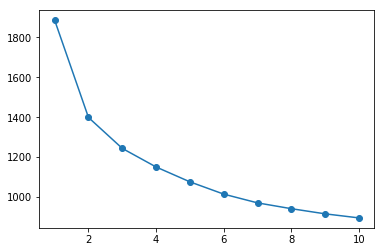

In [164]:
plt.figure()
plt.plot(elbow.cluster, elbow.inertia, marker='o')
plt.show()

In [165]:
# we get the elbow at 2
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(sdf1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [166]:
centroid2 = pd.DataFrame(kmeans2.cluster_centers_, columns=sdf1.columns)
centroid2

avganncount  avgdeathsperyear  target_deathrate  medincome  popest2015  \
0     0.017469          0.017596          0.356701   0.313789    0.014313   
1     0.007017          0.007889          0.433336   0.149644    0.005102   

   povertypercent  studypercap  binnedinc  medianage  medianagemale    ...     \
0        0.212170     0.020709   0.749179   0.036065       0.399155    ...      
1        0.420495     0.010451   0.215117   0.040591       0.413657    ...      

   pctempprivcoverage  pctpubliccoverage  pctpubliccoveragealone  pctwhite  \
0            0.587756           0.372531                0.286323  0.864977   
1            0.366020           0.570099                0.483019  0.764126   

   pctblack  pctasian  pctotherrace  pctmarriedhouseholds  birthrate     state  
0  0.057707  0.041932      0.048542              0.554403   0.268012  0.540899  
1  0.161053  0.015146      0.045893              0.465510   0.260446  0.505664  

[2 rows x 32 columns]

In [167]:
cent_tmp = centroid2.T
cent_tmp.reset_index(inplace=True)
cent_tmp

index         0         1
0               avganncount  0.017469  0.007017
1          avgdeathsperyear  0.017596  0.007889
2          target_deathrate  0.356701  0.433336
3                 medincome  0.313789  0.149644
4                popest2015  0.014313  0.005102
5            povertypercent  0.212170  0.420495
6               studypercap  0.020709  0.010451
7                 binnedinc  0.749179  0.215117
8                 medianage  0.036065  0.040591
9             medianagemale  0.399155  0.413657
10          medianagefemale  0.444862  0.471421
11         avghouseholdsize  0.622706  0.622262
12           percentmarried  0.626870  0.527450
13             pctnohs18_24  0.246720  0.327215
14               pcths18_24  0.457154  0.512041
15          pctbachdeg18_24  0.150793  0.082472
16             pcths25_over  0.533488  0.627227
17        pctbachdeg25_over  0.343210  0.189848
18       pctemployed16_over  0.588569  0.582412
19     pctunemployed16_over  0.198605  0.323600
20       pctprivatecoverage  0.704136  0.482835
21  pctprivatecoveragealone  0.520239  0.515053
22       pctempprivcoverage  0.587756  0.366020
23        pctpubliccoverage  0.372531  0.570099
24   pctpubliccoveragealone  0.286323  0.483019
25                 pctwhite  0.864977  0.764126
26                 pctblack  0.057707  0.161053
27                 pctasian  0.041932  0.015146
28             pctotherrace  0.048542  0.045893
29     pctmarriedhouseholds  0.554403  0.465510
30                birthrate  0.268012  0.260446
31                    state  0.540899  0.505664

In [168]:
cent_tmp.columns = ['feature', 'one', 'two']
cent_tmp

feature       one       two
0               avganncount  0.017469  0.007017
1          avgdeathsperyear  0.017596  0.007889
2          target_deathrate  0.356701  0.433336
3                 medincome  0.313789  0.149644
4                popest2015  0.014313  0.005102
5            povertypercent  0.212170  0.420495
6               studypercap  0.020709  0.010451
7                 binnedinc  0.749179  0.215117
8                 medianage  0.036065  0.040591
9             medianagemale  0.399155  0.413657
10          medianagefemale  0.444862  0.471421
11         avghouseholdsize  0.622706  0.622262
12           percentmarried  0.626870  0.527450
13             pctnohs18_24  0.246720  0.327215
14               pcths18_24  0.457154  0.512041
15          pctbachdeg18_24  0.150793  0.082472
16             pcths25_over  0.533488  0.627227
17        pctbachdeg25_over  0.343210  0.189848
18       pctemployed16_over  0.588569  0.582412
19     pctunemployed16_over  0.198605  0.323600
20       pctprivatecoverage  0.704136  0.482835
21  pctprivatecoveragealone  0.520239  0.515053
22       pctempprivcoverage  0.587756  0.366020
23        pctpubliccoverage  0.372531  0.570099
24   pctpubliccoveragealone  0.286323  0.483019
25                 pctwhite  0.864977  0.764126
26                 pctblack  0.057707  0.161053
27                 pctasian  0.041932  0.015146
28             pctotherrace  0.048542  0.045893
29     pctmarriedhouseholds  0.554403  0.465510
30                birthrate  0.268012  0.260446
31                    state  0.540899  0.505664

In [169]:
cent_tmp['differ'] = cent_tmp.one - cent_tmp.two
cent_tmp

feature       one       two    differ
0               avganncount  0.017469  0.007017  0.010452
1          avgdeathsperyear  0.017596  0.007889  0.009707
2          target_deathrate  0.356701  0.433336 -0.076635
3                 medincome  0.313789  0.149644  0.164146
4                popest2015  0.014313  0.005102  0.009210
5            povertypercent  0.212170  0.420495 -0.208325
6               studypercap  0.020709  0.010451  0.010258
7                 binnedinc  0.749179  0.215117  0.534062
8                 medianage  0.036065  0.040591 -0.004526
9             medianagemale  0.399155  0.413657 -0.014502
10          medianagefemale  0.444862  0.471421 -0.026559
11         avghouseholdsize  0.622706  0.622262  0.000443
12           percentmarried  0.626870  0.527450  0.099420
13             pctnohs18_24  0.246720  0.327215 -0.080495
14               pcths18_24  0.457154  0.512041 -0.054887
15          pctbachdeg18_24  0.150793  0.082472  0.068321
16             pcths25_over  0.533488  0.627227 -0.093738
17        pctbachdeg25_over  0.343210  0.189848  0.153362
18       pctemployed16_over  0.588569  0.582412  0.006157
19     pctunemployed16_over  0.198605  0.323600 -0.124995
20       pctprivatecoverage  0.704136  0.482835  0.221301
21  pctprivatecoveragealone  0.520239  0.515053  0.005186
22       pctempprivcoverage  0.587756  0.366020  0.221736
23        pctpubliccoverage  0.372531  0.570099 -0.197567
24   pctpubliccoveragealone  0.286323  0.483019 -0.196696
25                 pctwhite  0.864977  0.764126  0.100852
26                 pctblack  0.057707  0.161053 -0.103346
27                 pctasian  0.041932  0.015146  0.026785
28             pctotherrace  0.048542  0.045893  0.002649
29     pctmarriedhouseholds  0.554403  0.465510  0.088893
30                birthrate  0.268012  0.260446  0.007566
31                    state  0.540899  0.505664  0.035235

In [170]:
cent_tmp['abs_diff'] = cent_tmp.differ.abs()
cent_tmp

feature       one       two    differ  abs_diff
0               avganncount  0.017469  0.007017  0.010452  0.010452
1          avgdeathsperyear  0.017596  0.007889  0.009707  0.009707
2          target_deathrate  0.356701  0.433336 -0.076635  0.076635
3                 medincome  0.313789  0.149644  0.164146  0.164146
4                popest2015  0.014313  0.005102  0.009210  0.009210
5            povertypercent  0.212170  0.420495 -0.208325  0.208325
6               studypercap  0.020709  0.010451  0.010258  0.010258
7                 binnedinc  0.749179  0.215117  0.534062  0.534062
8                 medianage  0.036065  0.040591 -0.004526  0.004526
9             medianagemale  0.399155  0.413657 -0.014502  0.014502
10          medianagefemale  0.444862  0.471421 -0.026559  0.026559
11         avghouseholdsize  0.622706  0.622262  0.000443  0.000443
12           percentmarried  0.626870  0.527450  0.099420  0.099420
13             pctnohs18_24  0.246720  0.327215 -0.080495  0.080495
14               pcths18_24  0.457154  0.512041 -0.054887  0.054887
15          pctbachdeg18_24  0.150793  0.082472  0.068321  0.068321
16             pcths25_over  0.533488  0.627227 -0.093738  0.093738
17        pctbachdeg25_over  0.343210  0.189848  0.153362  0.153362
18       pctemployed16_over  0.588569  0.582412  0.006157  0.006157
19     pctunemployed16_over  0.198605  0.323600 -0.124995  0.124995
20       pctprivatecoverage  0.704136  0.482835  0.221301  0.221301
21  pctprivatecoveragealone  0.520239  0.515053  0.005186  0.005186
22       pctempprivcoverage  0.587756  0.366020  0.221736  0.221736
23        pctpubliccoverage  0.372531  0.570099 -0.197567  0.197567
24   pctpubliccoveragealone  0.286323  0.483019 -0.196696  0.196696
25                 pctwhite  0.864977  0.764126  0.100852  0.100852
26                 pctblack  0.057707  0.161053 -0.103346  0.103346
27                 pctasian  0.041932  0.015146  0.026785  0.026785
28             pctotherrace  0.048542  0.045893  0.002649  0.002649
29     pctmarriedhouseholds  0.554403  0.465510  0.088893  0.088893
30                birthrate  0.268012  0.260446  0.007566  0.007566
31                    state  0.540899  0.505664  0.035235  0.035235

In [171]:
cent_tmp = cent_tmp.sort_values(by='abs_diff', ascending=False)
cent_tmp

feature       one       two    differ  abs_diff
7                 binnedinc  0.749179  0.215117  0.534062  0.534062
22       pctempprivcoverage  0.587756  0.366020  0.221736  0.221736
20       pctprivatecoverage  0.704136  0.482835  0.221301  0.221301
5            povertypercent  0.212170  0.420495 -0.208325  0.208325
23        pctpubliccoverage  0.372531  0.570099 -0.197567  0.197567
24   pctpubliccoveragealone  0.286323  0.483019 -0.196696  0.196696
3                 medincome  0.313789  0.149644  0.164146  0.164146
17        pctbachdeg25_over  0.343210  0.189848  0.153362  0.153362
19     pctunemployed16_over  0.198605  0.323600 -0.124995  0.124995
26                 pctblack  0.057707  0.161053 -0.103346  0.103346
25                 pctwhite  0.864977  0.764126  0.100852  0.100852
12           percentmarried  0.626870  0.527450  0.099420  0.099420
16             pcths25_over  0.533488  0.627227 -0.093738  0.093738
29     pctmarriedhouseholds  0.554403  0.465510  0.088893  0.088893
13             pctnohs18_24  0.246720  0.327215 -0.080495  0.080495
2          target_deathrate  0.356701  0.433336 -0.076635  0.076635
15          pctbachdeg18_24  0.150793  0.082472  0.068321  0.068321
14               pcths18_24  0.457154  0.512041 -0.054887  0.054887
31                    state  0.540899  0.505664  0.035235  0.035235
27                 pctasian  0.041932  0.015146  0.026785  0.026785
10          medianagefemale  0.444862  0.471421 -0.026559  0.026559
9             medianagemale  0.399155  0.413657 -0.014502  0.014502
0               avganncount  0.017469  0.007017  0.010452  0.010452
6               studypercap  0.020709  0.010451  0.010258  0.010258
1          avgdeathsperyear  0.017596  0.007889  0.009707  0.009707
4                popest2015  0.014313  0.005102  0.009210  0.009210
30                birthrate  0.268012  0.260446  0.007566  0.007566
18       pctemployed16_over  0.588569  0.582412  0.006157  0.006157
21  pctprivatecoveragealone  0.520239  0.515053  0.005186  0.005186
8                 medianage  0.036065  0.040591 -0.004526  0.004526
28             pctotherrace  0.048542  0.045893  0.002649  0.002649
11         avghouseholdsize  0.622706  0.622262  0.000443  0.000443

In [172]:
cent_tmp.abs_diff.sum()

2.9580156416437178

In [173]:
cent_tmp['pct_exp'] = (cent_tmp.abs_diff / cent_tmp.abs_diff.sum())
cent_tmp

feature       one       two    differ  abs_diff   pct_exp
7                 binnedinc  0.749179  0.215117  0.534062  0.534062  0.180547
22       pctempprivcoverage  0.587756  0.366020  0.221736  0.221736  0.074961
20       pctprivatecoverage  0.704136  0.482835  0.221301  0.221301  0.074814
5            povertypercent  0.212170  0.420495 -0.208325  0.208325  0.070427
23        pctpubliccoverage  0.372531  0.570099 -0.197567  0.197567  0.066791
24   pctpubliccoveragealone  0.286323  0.483019 -0.196696  0.196696  0.066496
3                 medincome  0.313789  0.149644  0.164146  0.164146  0.055492
17        pctbachdeg25_over  0.343210  0.189848  0.153362  0.153362  0.051846
19     pctunemployed16_over  0.198605  0.323600 -0.124995  0.124995  0.042256
26                 pctblack  0.057707  0.161053 -0.103346  0.103346  0.034938
25                 pctwhite  0.864977  0.764126  0.100852  0.100852  0.034094
12           percentmarried  0.626870  0.527450  0.099420  0.099420  0.033610
16             pcths25_over  0.533488  0.627227 -0.093738  0.093738  0.031690
29     pctmarriedhouseholds  0.554403  0.465510  0.088893  0.088893  0.030052
13             pctnohs18_24  0.246720  0.327215 -0.080495  0.080495  0.027212
2          target_deathrate  0.356701  0.433336 -0.076635  0.076635  0.025908
15          pctbachdeg18_24  0.150793  0.082472  0.068321  0.068321  0.023097
14               pcths18_24  0.457154  0.512041 -0.054887  0.054887  0.018555
31                    state  0.540899  0.505664  0.035235  0.035235  0.011912
27                 pctasian  0.041932  0.015146  0.026785  0.026785  0.009055
10          medianagefemale  0.444862  0.471421 -0.026559  0.026559  0.008979
9             medianagemale  0.399155  0.413657 -0.014502  0.014502  0.004903
0               avganncount  0.017469  0.007017  0.010452  0.010452  0.003533
6               studypercap  0.020709  0.010451  0.010258  0.010258  0.003468
1          avgdeathsperyear  0.017596  0.007889  0.009707  0.009707  0.003282
4                popest2015  0.014313  0.005102  0.009210  0.009210  0.003114
30                birthrate  0.268012  0.260446  0.007566  0.007566  0.002558
18       pctemployed16_over  0.588569  0.582412  0.006157  0.006157  0.002081
21  pctprivatecoveragealone  0.520239  0.515053  0.005186  0.005186  0.001753
8                 medianage  0.036065  0.040591 -0.004526  0.004526  0.001530
28             pctotherrace  0.048542  0.045893  0.002649  0.002649  0.000896
11         avghouseholdsize  0.622706  0.622262  0.000443  0.000443  0.000150

In [174]:
cent_tmp1 = cent_tmp[cent_tmp.pct_exp>0.02]
cent_tmp1

feature       one       two    differ  abs_diff   pct_exp
7                binnedinc  0.749179  0.215117  0.534062  0.534062  0.180547
22      pctempprivcoverage  0.587756  0.366020  0.221736  0.221736  0.074961
20      pctprivatecoverage  0.704136  0.482835  0.221301  0.221301  0.074814
5           povertypercent  0.212170  0.420495 -0.208325  0.208325  0.070427
23       pctpubliccoverage  0.372531  0.570099 -0.197567  0.197567  0.066791
24  pctpubliccoveragealone  0.286323  0.483019 -0.196696  0.196696  0.066496
3                medincome  0.313789  0.149644  0.164146  0.164146  0.055492
17       pctbachdeg25_over  0.343210  0.189848  0.153362  0.153362  0.051846
19    pctunemployed16_over  0.198605  0.323600 -0.124995  0.124995  0.042256
26                pctblack  0.057707  0.161053 -0.103346  0.103346  0.034938
25                pctwhite  0.864977  0.764126  0.100852  0.100852  0.034094
12          percentmarried  0.626870  0.527450  0.099420  0.099420  0.033610
16            pcths25_over  0.533488  0.627227 -0.093738  0.093738  0.031690
29    pctmarriedhouseholds  0.554403  0.465510  0.088893  0.088893  0.030052
13            pctnohs18_24  0.246720  0.327215 -0.080495  0.080495  0.027212
2         target_deathrate  0.356701  0.433336 -0.076635  0.076635  0.025908
15         pctbachdeg18_24  0.150793  0.082472  0.068321  0.068321  0.023097

In [175]:
coeff = np.where(cent_tmp1.differ<0, cent_tmp1.pct_exp*(-1), cent_tmp1.pct_exp)
coeff

array([ 0.18054747,  0.07496113,  0.07481404, -0.0704274 , -0.06679054,
       -0.06649599,  0.05549177,  0.05184621, -0.04225637, -0.03493761,
        0.0340944 ,  0.03361043, -0.03168961,  0.03005173, -0.02721241,
       -0.0259075 ,  0.02309707])

In [176]:
np.sum(cent_tmp1.pct_exp)   # by discarding the less than 2% varying features we have retained 96% of the info.

0.9242316848505004

In [177]:
cent_tmp1.shape     # we now have 17 columns only

(17, 6)

In [178]:
r = list(cent_tmp1.feature)
r

['binnedinc',
 'pctempprivcoverage',
 'pctprivatecoverage',
 'povertypercent',
 'pctpubliccoverage',
 'pctpubliccoveragealone',
 'medincome',
 'pctbachdeg25_over',
 'pctunemployed16_over',
 'pctblack',
 'pctwhite',
 'percentmarried',
 'pcths25_over',
 'pctmarriedhouseholds',
 'pctnohs18_24',
 'target_deathrate',
 'pctbachdeg18_24']

In [179]:
tr = df[r]
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 17 columns):
binnedinc                 3047 non-null object
pctempprivcoverage        3047 non-null float64
pctprivatecoverage        3047 non-null float64
povertypercent            3047 non-null float64
pctpubliccoverage         3047 non-null float64
pctpubliccoveragealone    3047 non-null float64
medincome                 3047 non-null int64
pctbachdeg25_over         3047 non-null float64
pctunemployed16_over      3047 non-null float64
pctblack                  3047 non-null float64
pctwhite                  3047 non-null float64
percentmarried            3047 non-null float64
pcths25_over              3047 non-null float64
pctmarriedhouseholds      3047 non-null float64
pctnohs18_24              3047 non-null float64
target_deathrate          3047 non-null float64
pctbachdeg18_24           3047 non-null float64
dtypes: float64(15), int64(1), object(1)
memory usage: 404.8+ KB


In [180]:
tr.head().T

0                   1  \
binnedinc               (61494.5, 125635]  (48021.6, 51046.4]   
pctempprivcoverage                   41.6                43.6   
pctprivatecoverage                   75.1                70.2   
povertypercent                       11.2                18.6   
pctpubliccoverage                    32.9                31.1   
pctpubliccoveragealone                 14                15.3   
medincome                           61898               48127   
pctbachdeg25_over                    19.6                22.7   
pctunemployed16_over                    8                 7.8   
pctblack                          2.59473            0.969102   
pctwhite                          81.7805             89.2285   
percentmarried                       52.5                44.5   
pcths25_over                         23.2                  26   
pctmarriedhouseholds              52.8561             45.3725   
pctnohs18_24                         11.5                 6.1   
target_deathrate                    164.9               161.3   
pctbachdeg18_24                       6.9                 7.5   

                                         2                 3  \
binnedinc               (48021.6, 51046.4]  (42724.4, 45201]   
pctempprivcoverage                    34.9                35   
pctprivatecoverage                    63.7              58.4   
povertypercent                        14.6              17.1   
pctpubliccoverage                     42.1              45.3   
pctpubliccoveragealone                21.1                25   
medincome                            49348             44243   
pctbachdeg25_over                       16               9.3   
pctunemployed16_over                     7              12.1   
pctblack                          0.739673          0.782626   
pctwhite                           90.9222           91.7447   
percentmarried                        54.2              52.7   
pcths25_over                            29              31.6   
pctmarriedhouseholds               54.4449           51.0215   
pctnohs18_24                            24              20.2   
target_deathrate                     174.7             194.8   
pctbachdeg18_24                        9.5               2.5   

                                         4  
binnedinc               (48021.6, 51046.4]  
pctempprivcoverage                    35.1  
pctprivatecoverage                    61.6  
povertypercent                        12.5  
pctpubliccoverage                       44  
pctpubliccoveragealone                22.7  
medincome                            49955  
pctbachdeg25_over                       15  
pctunemployed16_over                   4.8  
pctblack                          0.270192  
pctwhite                            94.104  
percentmarried                        57.8  
pcths25_over                          33.4  
pctmarriedhouseholds               54.0275  
pctnohs18_24                          14.9  
target_deathrate                     144.4  
pctbachdeg18_24                          2

In [181]:
tr.shape

(3047, 17)

In [182]:
t

[9,
 6,
 6,
 4,
 6,
 7,
 2,
 2,
 3,
 8,
 8,
 7,
 7,
 9,
 6,
 4,
 9,
 6,
 6,
 7,
 3,
 4,
 1,
 8,
 2,
 0,
 4,
 1,
 0,
 0,
 3,
 1,
 0,
 3,
 1,
 1,
 6,
 3,
 3,
 3,
 9,
 4,
 3,
 1,
 1,
 0,
 4,
 4,
 1,
 1,
 2,
 0,
 4,
 1,
 4,
 1,
 2,
 2,
 4,
 1,
 3,
 8,
 2,
 2,
 5,
 0,
 0,
 2,
 1,
 3,
 2,
 1,
 0,
 2,
 2,
 3,
 1,
 3,
 3,
 5,
 4,
 7,
 6,
 3,
 9,
 7,
 5,
 8,
 4,
 9,
 7,
 6,
 5,
 7,
 6,
 4,
 7,
 3,
 5,
 7,
 9,
 2,
 4,
 8,
 6,
 3,
 4,
 9,
 7,
 3,
 7,
 5,
 7,
 8,
 9,
 5,
 9,
 9,
 9,
 5,
 6,
 3,
 4,
 7,
 8,
 7,
 8,
 5,
 8,
 8,
 8,
 3,
 8,
 9,
 9,
 9,
 8,
 8,
 7,
 9,
 9,
 9,
 8,
 5,
 8,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 9,
 9,
 9,
 9,
 5,
 0,
 2,
 1,
 1,
 3,
 0,
 2,
 8,
 2,
 0,
 1,
 8,
 2,
 9,
 0,
 0,
 0,
 3,
 0,
 1,
 1,
 8,
 5,
 0,
 7,
 0,
 0,
 1,
 1,
 1,
 3,
 8,
 3,
 0,
 5,
 4,
 7,
 3,
 6,
 5,
 1,
 2,
 9,
 9,
 5,
 9,
 9,
 5,
 0,
 9,
 8,
 2,
 7,
 8,
 2,
 6,
 4,
 6,
 9,
 1,
 7,
 2,
 8,
 4,
 1,
 4,
 9,
 2,
 9,
 9,
 5,
 9,
 3,
 9,
 6,
 8,
 1,
 1,
 5,
 2,
 5,
 9,
 9,
 6,
 2,
 2,
 8,
 4,
 6,
 2,


In [183]:
tr.binnedinc = t
tr.head().T

C:\Users\suraj\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0             1             2  \
binnedinc                   9.000000      6.000000      6.000000   
pctempprivcoverage         41.600000     43.600000     34.900000   
pctprivatecoverage         75.100000     70.200000     63.700000   
povertypercent             11.200000     18.600000     14.600000   
pctpubliccoverage          32.900000     31.100000     42.100000   
pctpubliccoveragealone     14.000000     15.300000     21.100000   
medincome               61898.000000  48127.000000  49348.000000   
pctbachdeg25_over          19.600000     22.700000     16.000000   
pctunemployed16_over        8.000000      7.800000      7.000000   
pctblack                    2.594728      0.969102      0.739673   
pctwhite                   81.780529     89.228509     90.922190   
percentmarried             52.500000     44.500000     54.200000   
pcths25_over               23.200000     26.000000     29.000000   
pctmarriedhouseholds       52.856076     45.372500     54.444868   
pctnohs18_24               11.500000      6.100000     24.000000   
target_deathrate          164.900000    161.300000    174.700000   
pctbachdeg18_24             6.900000      7.500000      9.500000   

                                   3             4  
binnedinc                   4.000000      6.000000  
pctempprivcoverage         35.000000     35.100000  
pctprivatecoverage         58.400000     61.600000  
povertypercent             17.100000     12.500000  
pctpubliccoverage          45.300000     44.000000  
pctpubliccoveragealone     25.000000     22.700000  
medincome               44243.000000  49955.000000  
pctbachdeg25_over           9.300000     15.000000  
pctunemployed16_over       12.100000      4.800000  
pctblack                    0.782626      0.270192  
pctwhite                   91.744686     94.104024  
percentmarried             52.700000     57.800000  
pcths25_over               31.600000     33.400000  
pctmarriedhouseholds       51.021514     54.027460  
pctnohs18_24               20.200000     14.900000  
target_deathrate          194.800000    144.400000  
pctbachdeg18_24             2.500000      2.000000

In [184]:
tr1 = tr.copy()

In [185]:
# min max normalizing this data as binned income is categoric:
for i in tr1.columns:
    tr1[i] = (tr1[i] - min(tr1[i])) / (max(tr1[i]) - min(tr1[i]))
    
tr1.head().T

0         1         2         3         4
binnedinc               1.000000  0.666667  0.666667  0.444444  0.666667
pctempprivcoverage      0.491259  0.526224  0.374126  0.375874  0.377622
pctprivatecoverage      0.754286  0.684286  0.591429  0.515714  0.561429
povertypercent          0.180995  0.348416  0.257919  0.314480  0.210407
pctpubliccoverage       0.402597  0.369202  0.573284  0.632653  0.608534
pctpubliccoveragealone  0.259091  0.288636  0.420455  0.509091  0.456818
medincome               0.381164  0.247459  0.259314  0.209748  0.265207
pctbachdeg25_over       0.430730  0.508816  0.340050  0.171285  0.314861
pctunemployed16_over    0.262069  0.255172  0.227586  0.403448  0.151724
pctblack                0.030190  0.011275  0.008606  0.009106  0.003144
pctwhite                0.797112  0.880051  0.898912  0.908071  0.934344
percentmarried          0.595142  0.433198  0.629555  0.599190  0.702429
pcths25_over            0.331924  0.391121  0.454545  0.509514  0.547569
pctmarriedhouseholds    0.542157  0.406297  0.571001  0.508852  0.563423
pctnohs18_24            0.179407  0.095164  0.374415  0.315133  0.232449
target_deathrate        0.347080  0.335203  0.379413  0.445727  0.279446
pctbachdeg18_24         0.133205  0.144788  0.183398  0.048263  0.038610

In [186]:
for i in tr1.columns:
    print(i, min(tr1[i]), max(tr1[i]))

binnedinc 0.0 1.0
pctempprivcoverage 0.0 1.0
pctprivatecoverage 0.0 1.0
povertypercent 0.0 1.0
pctpubliccoverage 0.0 1.0
pctpubliccoveragealone 0.0 1.0
medincome 0.0 1.0
pctbachdeg25_over 0.0 1.0
pctunemployed16_over 0.0 1.0
pctblack 0.0 1.0
pctwhite 0.0 1.0
percentmarried 0.0 1.0
pcths25_over 0.0 1.0
pctmarriedhouseholds 0.0 1.0
pctnohs18_24 0.0 1.0
target_deathrate 0.0 1.0
pctbachdeg18_24 0.0 1.0


In [187]:
coeff.shape

(17,)

In [188]:
coeff

array([ 0.18054747,  0.07496113,  0.07481404, -0.0704274 , -0.06679054,
       -0.06649599,  0.05549177,  0.05184621, -0.04225637, -0.03493761,
        0.0340944 ,  0.03361043, -0.03168961,  0.03005173, -0.02721241,
       -0.0259075 ,  0.02309707])

In [189]:
val = tr1.values
val

array([[1.        , 0.49125874, 0.75428571, ..., 0.17940718, 0.34708017,
        0.13320463],
       [0.66666667, 0.52622378, 0.68428571, ..., 0.09516381, 0.3352029 ,
        0.14478764],
       [0.66666667, 0.37412587, 0.59142857, ..., 0.37441498, 0.37941274,
        0.18339768],
       ...,
       [0.77777778, 0.59965035, 0.56714286, ..., 0.30733229, 0.31078852,
        0.04826255],
       [0.66666667, 0.63111888, 0.76571429, ..., 0.1700468 , 0.38040251,
        0.07915058],
       [0.33333333, 0.16433566, 0.76857143, ..., 0.12480499, 0.50775322,
        0.09266409]])

In [190]:
val.shape

(3047, 17)

In [191]:
score = np.dot(val, coeff)
score

array([0.29044989, 0.2080011 , 0.1691267 , ..., 0.2305405 , 0.23293395,
       0.12185747])

C:\Users\suraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


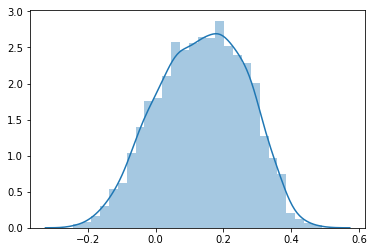

In [192]:
sns.distplot(score)

In [193]:
tr.head().T

0             1             2  \
binnedinc                   9.000000      6.000000      6.000000   
pctempprivcoverage         41.600000     43.600000     34.900000   
pctprivatecoverage         75.100000     70.200000     63.700000   
povertypercent             11.200000     18.600000     14.600000   
pctpubliccoverage          32.900000     31.100000     42.100000   
pctpubliccoveragealone     14.000000     15.300000     21.100000   
medincome               61898.000000  48127.000000  49348.000000   
pctbachdeg25_over          19.600000     22.700000     16.000000   
pctunemployed16_over        8.000000      7.800000      7.000000   
pctblack                    2.594728      0.969102      0.739673   
pctwhite                   81.780529     89.228509     90.922190   
percentmarried             52.500000     44.500000     54.200000   
pcths25_over               23.200000     26.000000     29.000000   
pctmarriedhouseholds       52.856076     45.372500     54.444868   
pctnohs18_24               11.500000      6.100000     24.000000   
target_deathrate          164.900000    161.300000    174.700000   
pctbachdeg18_24             6.900000      7.500000      9.500000   

                                   3             4  
binnedinc                   4.000000      6.000000  
pctempprivcoverage         35.000000     35.100000  
pctprivatecoverage         58.400000     61.600000  
povertypercent             17.100000     12.500000  
pctpubliccoverage          45.300000     44.000000  
pctpubliccoveragealone     25.000000     22.700000  
medincome               44243.000000  49955.000000  
pctbachdeg25_over           9.300000     15.000000  
pctunemployed16_over       12.100000      4.800000  
pctblack                    0.782626      0.270192  
pctwhite                   91.744686     94.104024  
percentmarried             52.700000     57.800000  
pcths25_over               31.600000     33.400000  
pctmarriedhouseholds       51.021514     54.027460  
pctnohs18_24               20.200000     14.900000  
target_deathrate          194.800000    144.400000  
pctbachdeg18_24             2.500000      2.000000

In [194]:
tr['score'] = score
tr.head().T

C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0             1             2  \
binnedinc                   9.000000      6.000000      6.000000   
pctempprivcoverage         41.600000     43.600000     34.900000   
pctprivatecoverage         75.100000     70.200000     63.700000   
povertypercent             11.200000     18.600000     14.600000   
pctpubliccoverage          32.900000     31.100000     42.100000   
pctpubliccoveragealone     14.000000     15.300000     21.100000   
medincome               61898.000000  48127.000000  49348.000000   
pctbachdeg25_over          19.600000     22.700000     16.000000   
pctunemployed16_over        8.000000      7.800000      7.000000   
pctblack                    2.594728      0.969102      0.739673   
pctwhite                   81.780529     89.228509     90.922190   
percentmarried             52.500000     44.500000     54.200000   
pcths25_over               23.200000     26.000000     29.000000   
pctmarriedhouseholds       52.856076     45.372500     54.444868   
pctnohs18_24               11.500000      6.100000     24.000000   
target_deathrate          164.900000    161.300000    174.700000   
pctbachdeg18_24             6.900000      7.500000      9.500000   
score                       0.290450      0.208001      0.169127   

                                   3             4  
binnedinc                   4.000000      6.000000  
pctempprivcoverage         35.000000     35.100000  
pctprivatecoverage         58.400000     61.600000  
povertypercent             17.100000     12.500000  
pctpubliccoverage          45.300000     44.000000  
pctpubliccoveragealone     25.000000     22.700000  
medincome               44243.000000  49955.000000  
pctbachdeg25_over           9.300000     15.000000  
pctunemployed16_over       12.100000      4.800000  
pctblack                    0.782626      0.270192  
pctwhite                   91.744686     94.104024  
percentmarried             52.700000     57.800000  
pcths25_over               31.600000     33.400000  
pctmarriedhouseholds       51.021514     54.027460  
pctnohs18_24               20.200000     14.900000  
target_deathrate          194.800000    144.400000  
pctbachdeg18_24             2.500000      2.000000  
score                       0.083136      0.171726

In [195]:
tr.score.min()

-0.24264713813111993

In [196]:
tr.score.max()

0.4904247764226815

In [216]:
tr.shape

(3047, 20)

In [217]:
tr.columns

Index(['binnedinc', 'pctempprivcoverage', 'pctprivatecoverage',
       'povertypercent', 'pctpubliccoverage', 'pctpubliccoveragealone',
       'medincome', 'pctbachdeg25_over', 'pctunemployed16_over', 'pctblack',
       'pctwhite', 'percentmarried', 'pcths25_over', 'pctmarriedhouseholds',
       'pctnohs18_24', 'target_deathrate', 'pctbachdeg18_24', 'score',
       'geography', 'state'],
      dtype='object')

In [219]:
tr['cl2_labels']=kmeans2.labels_

C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [220]:
tr.head().T

0  \
binnedinc                                       9   
pctempprivcoverage                           41.6   
pctprivatecoverage                           75.1   
povertypercent                               11.2   
pctpubliccoverage                            32.9   
pctpubliccoveragealone                         14   
medincome                                   61898   
pctbachdeg25_over                            19.6   
pctunemployed16_over                            8   
pctblack                                  2.59473   
pctwhite                                  81.7805   
percentmarried                               52.5   
pcths25_over                                 23.2   
pctmarriedhouseholds                      52.8561   
pctnohs18_24                                 11.5   
target_deathrate                            164.9   
pctbachdeg18_24                               6.9   
score                                     0.29045   
geography               Kitsap County, Washington   
state                                  Washington   
cl2_labels                                      0   

                                                  1  \
binnedinc                                         6   
pctempprivcoverage                             43.6   
pctprivatecoverage                             70.2   
povertypercent                                 18.6   
pctpubliccoverage                              31.1   
pctpubliccoveragealone                         15.3   
medincome                                     48127   
pctbachdeg25_over                              22.7   
pctunemployed16_over                            7.8   
pctblack                                   0.969102   
pctwhite                                    89.2285   
percentmarried                                 44.5   
pcths25_over                                     26   
pctmarriedhouseholds                        45.3725   
pctnohs18_24                                    6.1   
target_deathrate                              161.3   
pctbachdeg18_24                                 7.5   
score                                      0.208001   
geography               Kittitas County, Washington   
state                                    Washington   
cl2_labels                                        0   

                                                   2  \
binnedinc                                          6   
pctempprivcoverage                              34.9   
pctprivatecoverage                              63.7   
povertypercent                                  14.6   
pctpubliccoverage                               42.1   
pctpubliccoveragealone                          21.1   
medincome                                      49348   
pctbachdeg25_over                                 16   
pctunemployed16_over                               7   
pctblack                                    0.739673   
pctwhite                                     90.9222   
percentmarried                                  54.2   
pcths25_over                                      29   
pctmarriedhouseholds                         54.4449   
pctnohs18_24                                      24   
target_deathrate                               174.7   
pctbachdeg18_24                                  9.5   
score                                       0.169127   
geography               Klickitat County, Washington   
state                                     Washington   
cl2_labels                                         0   

                                               3                           4  
binnedinc                                      4                           6  
pctempprivcoverage                            35                        35.1  
pctprivatecoverage                          58.4                        61.6  
povertypercent                              17.1                        12.5  
pctpubliccoverage                         

C:\Users\suraj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\suraj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


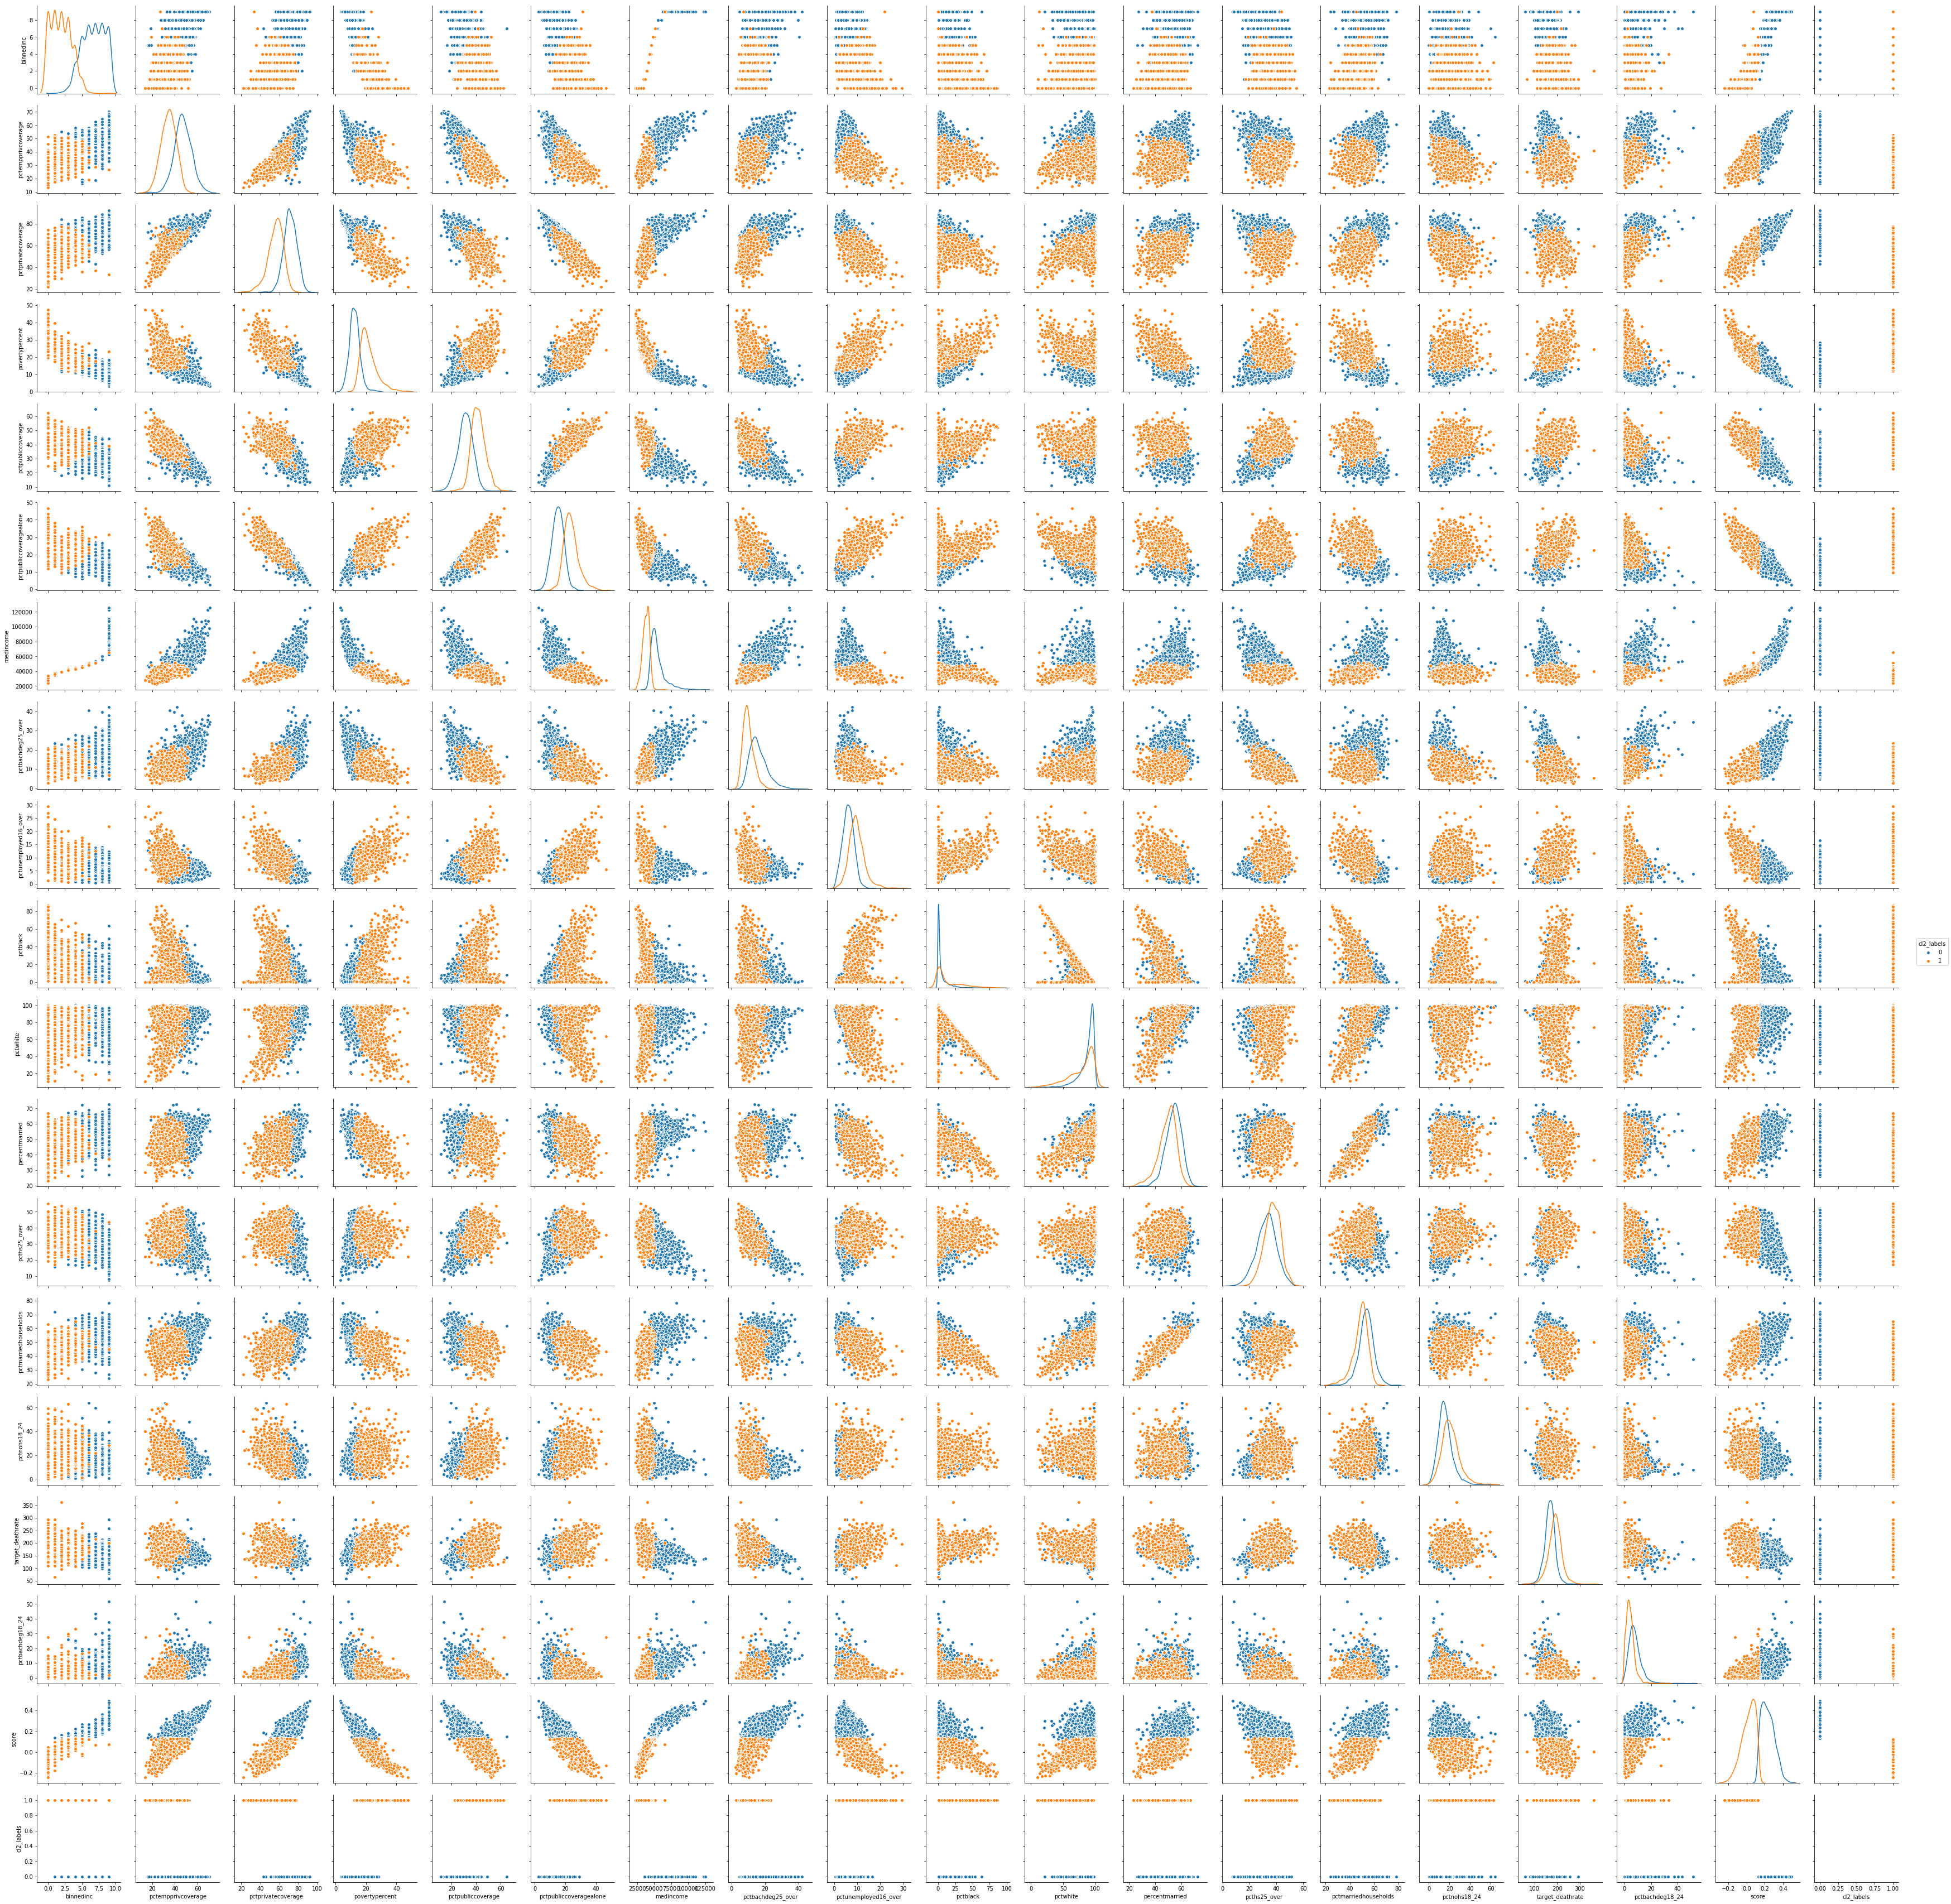

In [221]:
sns.pairplot(tr, diag_kind='kde', hue='cl2_labels')
plt.show()

In [198]:
tr.head()

binnedinc  pctempprivcoverage  pctprivatecoverage  povertypercent  \
0          9                41.6                75.1            11.2   
1          6                43.6                70.2            18.6   
2          6                34.9                63.7            14.6   
3          4                35.0                58.4            17.1   
4          6                35.1                61.6            12.5   

   pctpubliccoverage  pctpubliccoveragealone  medincome  pctbachdeg25_over  \
0               32.9                    14.0      61898               19.6   
1               31.1                    15.3      48127               22.7   
2               42.1                    21.1      49348               16.0   
3               45.3                    25.0      44243                9.3   
4               44.0                    22.7      49955               15.0   

   pctunemployed16_over  pctblack   pctwhite  percentmarried  pcths25_over  \
0                   8.0  2.594728  81.780529            52.5          23.2   
1                   7.8  0.969102  89.228509            44.5          26.0   
2                   7.0  0.739673  90.922190            54.2          29.0   
3                  12.1  0.782626  91.744686            52.7          31.6   
4                   4.8  0.270192  94.104024            57.8          33.4   

   pctmarriedhouseholds  pctnohs18_24  target_deathrate  pctbachdeg18_24  \
0             52.856076          11.5             164.9              6.9   
1             45.372500           6.1             161.3              7.5   
2             54.444868          24.0             174.7              9.5   
3             51.021514          20.2             194.8              2.5   
4             54.027460          14.9             144.4              2.0   

      score  
0  0.290450  
1  0.208001  
2  0.169127  
3  0.083136  
4  0.171726

In [199]:
tr.shape

(3047, 18)

In [200]:
tr['geography'] = df.geography

C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [201]:
tr['state'] = df.state

C:\Users\suraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [203]:
pls=tr.sort_values(by='score').head(50)
pls

binnedinc  pctempprivcoverage  pctprivatecoverage  povertypercent  \
2825          0                13.5                22.3            47.4   
1201          0                23.8                34.9            44.0   
1202          0                23.4                33.5            40.3   
808           0                22.5                36.3            43.0   
2545          0                23.5                37.9            42.6   
2625          0                19.6                35.2            37.3   
1235          0                22.1                33.8            36.2   
2784          0                16.8                32.0            38.6   
1207          0                28.0                43.0            38.5   
2711          0                24.3                41.2            33.7   
1428          0                23.8                44.7            33.2   
2451          0                23.6                41.3            39.4   
1217          0                26.6                38.9            40.1   
561           0                22.2                39.3            35.3   
544           0                24.0                39.9            39.3   
1203          1                18.3                36.6            39.5   
1770          0                28.1                47.9            39.9   
1238          0                24.4                41.7            37.4   
2548          0                27.8                42.7            35.0   
175           0                16.8                25.0            35.8   
1251          0                25.5                40.6            35.1   
2698          0                28.7                48.9            46.9   
2572          0                20.1                42.5            47.0   
1242          0                28.1                42.3            34.8   
823           0                23.5                36.8            41.4   
1257          0                27.2                41.7            34.6   
511           0                22.7                40.4            32.1   
2705          0                26.1                46.5            38.1   
1041          0                28.5                48.1            35.2   
2359          0                21.9                39.5            35.6   
2733          0                22.4                31.5            33.1   
1227          0                22.2                41.5            31.3   
726           0                27.0                45.4            41.9   
2443          0                20.9                41.8            36.3   
2593          0                21.9                35.9            45.1   
844           0                22.2                38.7            32.0   
1243          0                31.9                47.6            37.4   
1254          0                27.9                42.3            32.5   
2394          0                30.4                54.8            35.3   
2578          0                26.6                39.2            40.6   
45            0                23.4                39.7            34.9   
1392          0                26.4                39.7            38.2   
2695          0                32.4                48.1            35.1   
494           0                24.7                36.8            33.6   
554           0                22.4                42.4            28.1   
2540          0                28.8                42.8            34.0   
193           0                29.5                43.1            31.5   
2305          0                32.5                43.4            38.9   
570           0                27.7                45.2            33.4   
2420          0                30.0                49.2            34.1   

      pctpubliccoverage  pctpubliccoveragealone  medincome  pctbachdeg25_over  \
2825               52.3                    43.3      27481               10.3   
1201              

In [204]:
pls.geography

2825           Todd County, South Dakota
1201          Holmes County, Mississippi
1202       Humphreys County, Mississippi
808       East Carroll Parish, Louisiana
2545       Claiborne County, Mississippi
2625                Clay County, Georgia
1235         Quitman County, Mississippi
2784         Corson County, South Dakota
1207       Jefferson County, Mississippi
2711              Wilcox County, Alabama
1428              Greene County, Alabama
2451             Stewart County, Georgia
1217         Leflore County, Mississippi
561            Phillips County, Arkansas
544                 Lee County, Arkansas
1203       Issaquena County, Mississippi
1770    Allendale County, South Carolina
1238         Sharkey County, Mississippi
2548         Coahoma County, Mississippi
175          McKinley County, New Mexico
1251      Washington County, Mississippi
2698               Perry County, Alabama
2572           McCreary County, Kentucky
1242       Sunflower County, Mississippi
823            M

In [205]:
pls.state.value_counts()

Mississippi       16
Georgia            6
Alabama            6
Arkansas           5
Kentucky           4
Louisiana          3
South Dakota       2
Arizona            1
New York           1
West Virginia      1
North Dakota       1
New Mexico         1
Illinois           1
South Carolina     1
Tennessee          1
Name: state, dtype: int64

In [206]:
coeff

array([ 0.18054747,  0.07496113,  0.07481404, -0.0704274 , -0.06679054,
       -0.06649599,  0.05549177,  0.05184621, -0.04225637, -0.03493761,
        0.0340944 ,  0.03361043, -0.03168961,  0.03005173, -0.02721241,
       -0.0259075 ,  0.02309707])

In [211]:
e = list(tr1.columns)
e

['binnedinc',
 'pctempprivcoverage',
 'pctprivatecoverage',
 'povertypercent',
 'pctpubliccoverage',
 'pctpubliccoveragealone',
 'medincome',
 'pctbachdeg25_over',
 'pctunemployed16_over',
 'pctblack',
 'pctwhite',
 'percentmarried',
 'pcths25_over',
 'pctmarriedhouseholds',
 'pctnohs18_24',
 'target_deathrate',
 'pctbachdeg18_24']

In [212]:
pd.DataFrame({'feature':e, 'coefficients':coeff})

feature  coefficients
0                binnedinc      0.180547
1       pctempprivcoverage      0.074961
2       pctprivatecoverage      0.074814
3           povertypercent     -0.070427
4        pctpubliccoverage     -0.066791
5   pctpubliccoveragealone     -0.066496
6                medincome      0.055492
7        pctbachdeg25_over      0.051846
8     pctunemployed16_over     -0.042256
9                 pctblack     -0.034938
10                pctwhite      0.034094
11          percentmarried      0.033610
12            pcths25_over     -0.031690
13    pctmarriedhouseholds      0.030052
14            pctnohs18_24     -0.027212
15        target_deathrate     -0.025908
16         pctbachdeg18_24      0.023097